2025-11-12 11:44:09,894	WARNING tune_controller.py:2135 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (211 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent pending trials.
2025-11-12 11:44:09,898	WARNING tune_controller.py:2135 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (211 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent pending trials.


2025-11-12 11:44:11,875	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/mnt/data/home/yuhang/ray_results/yuhang/mini-radas--examples--basics' in 0.0278s.
2025-11-12 11:44:11,884	INFO tune.py:1041 -- Total run time: 2.02 seconds (1.95 seconds for the tuning loop).


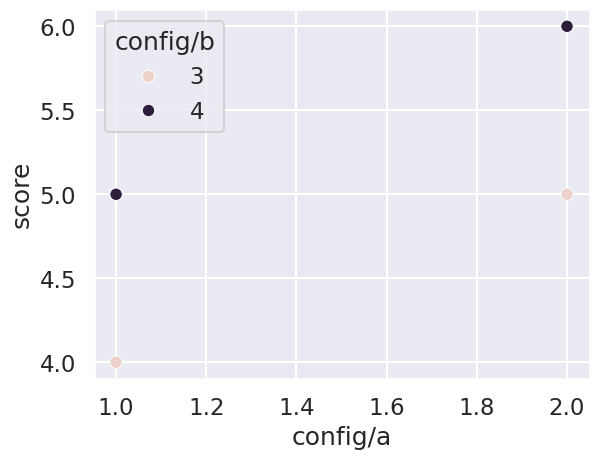

In [1]:
from ray import tune

def trainable(config):
    score = config["a"] + config["b"]
    return {"score": score}


config = {
    "a": tune.grid_search([1, 2]),
    "b": tune.grid_search([3, 4]),
}

from radas import run_experiment
import seaborn as sns

results = await run_experiment(
    user_name="yuhang",
    experiment_name="mini-radas--examples--basics",
    local_storage_path="~/ray_results/",
    trainable=trainable,
    param_space=config,
    #
    plot_fn=sns.scatterplot,
    plot_kwargs=dict(
        x="config/a",
        y="score",
        hue="config/b",
    ),
)